In [75]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [76]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [77]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [78]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [79]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

/var/folders/3v/bzrh0wc57bn90x31h169xt700000gn/T/ipykernel_19007/4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [80]:
# View all of the classes that automap found
Base.classes.keys()


['station', 'measurement']

In [81]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [82]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [83]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement).order_by(Measurement.date.desc()).first().date
recent_date


'2017-08-23'

2016-08-23


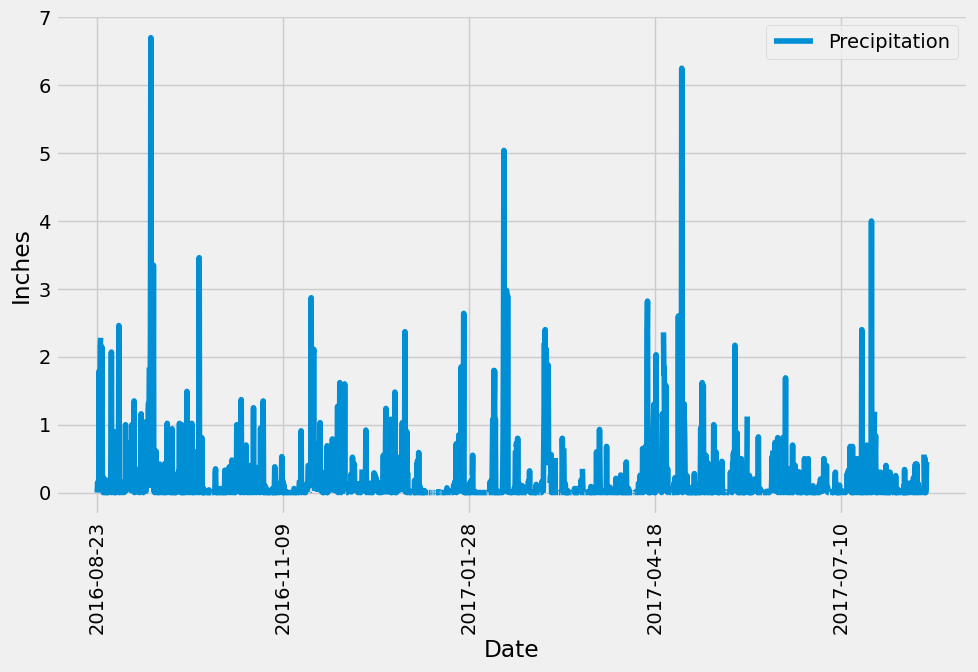

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

In [94]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = session.query(Measurement).order_by(Measurement.date.desc()).first().date
recent_date
# Calculate the date one year from the last date in data set.
one_year_from_last = dt.date(2017,8,23) - dt.timedelta(days= 365)
print(one_year_from_last)

# Perform a query to retrieve the data and precipitation scores
date_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_from_last).\
    order_by(Measurement.date).all()
    #filter(Measurement.prcp != None).all()
date_prcp
  
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
prcp_df = pd.DataFrame(date_prcp, columns=['Date', 'Precipitation'])
prcp_df.set_index('Date', inplace=True)
prcp_df.head()


# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(figsize=(10,6))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()
plt.savefig("../Precipitation.png")
plt.show

In [85]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [86]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [87]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
act_station = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
act_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [88]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
act_sta_id = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').all()
act_sta_id

[(54.0, 85.0, 71.66378066378067)]

In [89]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_result = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == 'USC00519281').\
                filter(Measurement.date >= one_year_from_last).all()
station_result_df = pd.DataFrame(station_result)
#station_result_df.set_index('station', inplace=True)
station_result_df.head()

,station,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0


<function matplotlib.pyplot.show(close=None, block=None)>

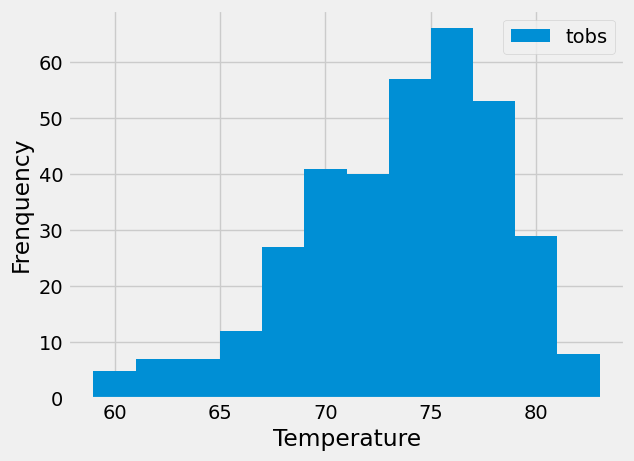

In [97]:
#plot the results as a histogram
station_result_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frenquency")
plt.savefig("../StationTemps.png")
plt.show

# Close Session

In [91]:
# Close Session
session.close()